In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from  sklearn.metrics  import  accuracy_score , precision_score , recall_score,confusion_matrix,classification_report

In [2]:
df = pd.read_csv("loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

<AxesSubplot:>

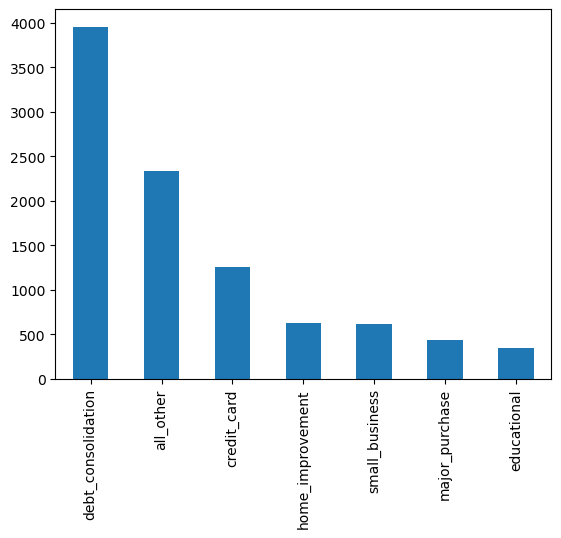

In [6]:
df['purpose'].value_counts().plot.bar()

#Converting column 'purpose' values in to numeric values


In [7]:
df['purpose']=LabelEncoder().fit_transform(df['purpose']) #Converting purpose values in to numeric values

In [8]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Data Visualization

Text(0.5, 0, 'FICO')

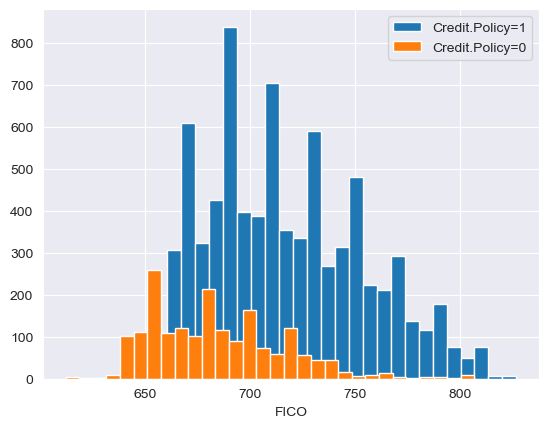

In [15]:
#Histogram
sns.set_style('darkgrid')
plt.hist(df['fico'].loc[df['credit.policy']==1], bins=30, label='Credit.Policy=1')
plt.hist(df['fico'].loc[df['credit.policy']==0], bins=30, label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

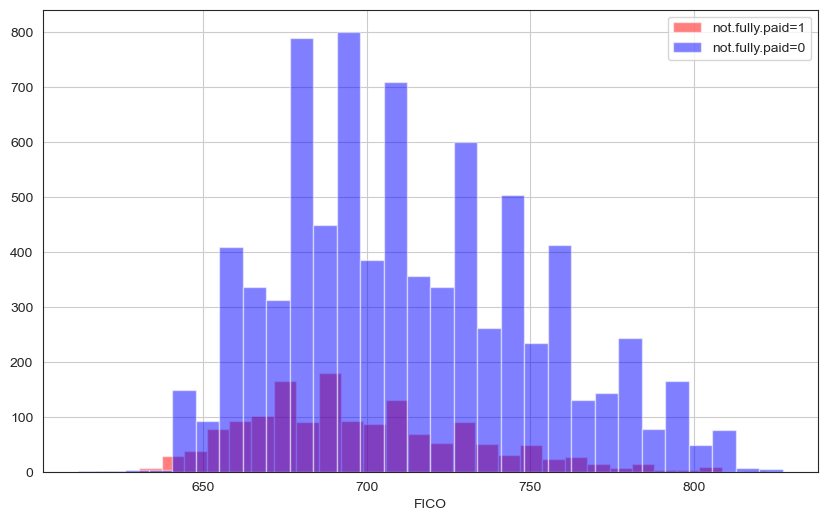

In [22]:
#Histogram
#alpha used for colour thickness.
sns.set_style('white')
plt.figure(figsize=(10,6)) #Width=10units,height=6units
df[df['not.fully.paid']==1]['fico'].hist(bins=30, alpha=0.5, color='red', label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(bins=30, alpha=0.5, color='blue', label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

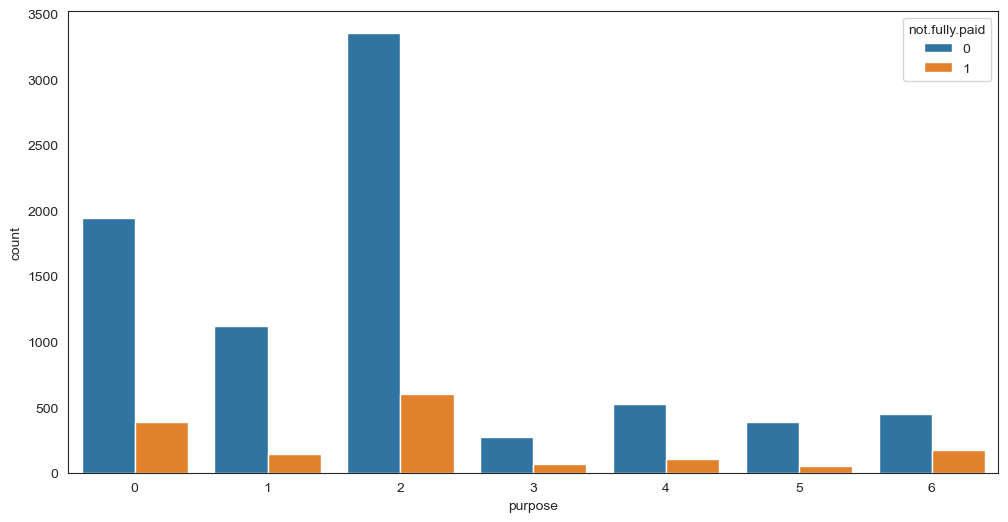

In [23]:
#creating a countplot to see the counts of purpose of loans by not.fully.paid
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='purpose', hue='not.fully.paid')

<Figure size 720x432 with 0 Axes>

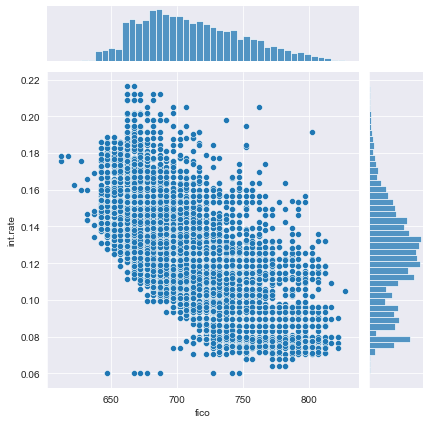

In [12]:
#checking the trend between FICO and the interest rate
plt.figure(figsize=(10,6))
sns.jointplot(x='fico', y='int.rate', data=df)

<AxesSubplot:xlabel='int.rate', ylabel='Density'>

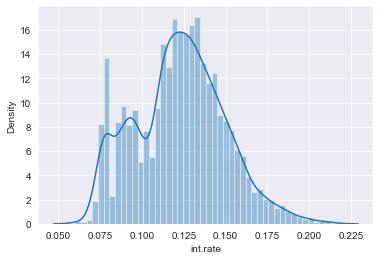

In [13]:
sns.distplot(df["int.rate"]) #Checking wheter it following any particular patter or not.

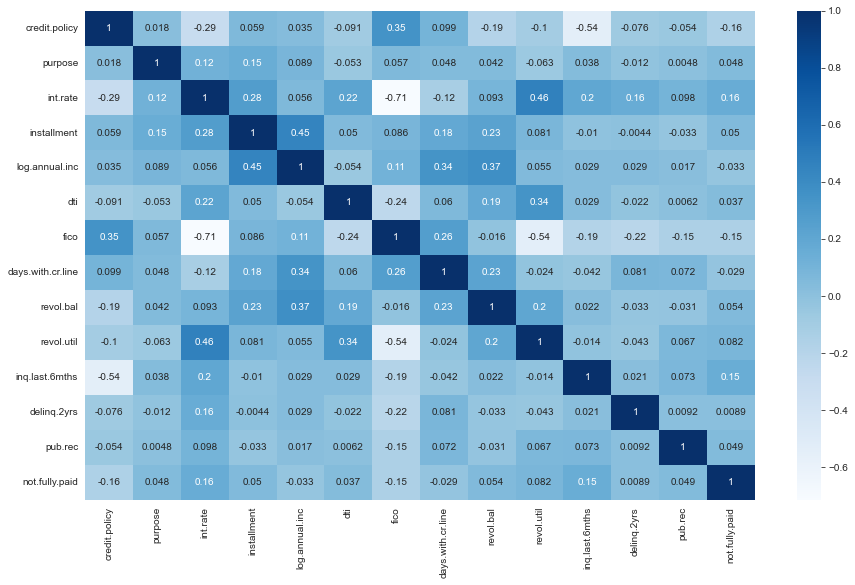

In [14]:
plt.figure(figsize = (15, 9)) 
sns.heatmap(df.corr(), cmap='Blues', annot=True)#If annot is True then it will return numeric values in each cell.
plt.show()

### Train-Test Split

Splitting the dataset for training and testing purpose.

In [25]:
# Dropping target class
X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
#random_state ensures that if you run the code multiple times, you'll get the same split each time, which is helpful for reproducibility.

# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [2,3, 4,5,6,7,8,9,10,11,13,15,20]}

grid_search = GridSearchCV(dt_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15,
                                       20]},
             return_train_score=True, scoring='recall_weighted')

In [18]:
grid_search.best_params_

{'max_depth': 2}

In [19]:
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X_train, y_train)
y_pred_train = dt_clf.predict(X_train)
y_pred_test = dt_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [20]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[2431    0]
 [ 443    0]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874



<---------------Accuracy Scores------------------->

Train Accuracy score:  0.8374105011933174
Test Accuracy score: 0.8458594293667363


2,431 instances were correctly predicted as "0" (negative class).
0 instances were incorrectly predicted as "1" (false positives).
443 instances were incorrectly predicted as "0" when they were actually "1" (false negatives).
0 instances were correctly predicted as "1" (true positives).

Precision measures how accurate your model's positive predictions (in this case, class "1") are.

For class "0," the precision is 0.85, which means that when your model predicts "0," it's correct 85% of the time.

For class "1," the precision is 0.00, which means that when your model predicts "1," it's almost always incorrect (0% precision).

Recall measures the ability of your model to correctly identify all relevant instances of a class.

For class "0," the recall is 1.00, meaning that your model is very good at identifying instances of class "0."

 For class "1," the recall is 0.00, indicating that your model is very poor at identifying instances of class "1." It's missing a significant number of actual "1" instances.

The F1-score is the harmonic mean of precision and recall and is a balanced metric that considers both false positives and false negatives.

For class "0," the F1-score is 0.92, which is a good balance between precision and recall.

For class "1," the F1-score is 0.00, indicating that the model's performance for this class is extremely poor.

 Support represents the number of actual occurrences of each class in the testing dataset.

For class "0," there are 2,431 instances and For class "1," there are 443 instances.

### We got Accuracy of 84.58% using Decision Tree Classifier.

# Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=600)
rf_clf.fit(X_train, y_train)
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [22]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
#print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[2426    5]
 [ 431   12]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.71      0.03      0.05       443

    accuracy                           0.85      2874
   macro avg       0.78      0.51      0.48      2874
weighted avg       0.83      0.85      0.78      2874



<---------------Accuracy Scores------------------->

Test Accuracy score: 0.848295059151009


Weighted Precision = (Precision for Class 0 * Support for Class 0 + Precision for Class 1 * Support for Class 1) / Total Support

#### 2,426 instances were correctly predicted as "0" (true negatives).
#### 5 instances were incorrectly predicted as "1" when they were actually "0" (false positives).
#### 431 instances were incorrectly predicted as "0" when they were actually "1" (false negatives).
#### 12 instances were correctly predicted as "1" (true positives).

#### We got Accuracy of 84.69% using Random Forest Classifier

#### On comparing Decision Tree Algorithm and Random Forest Algorithm we got the highest accuracy in Random Forest Algorithm of 84.69%. So, the best model for this dataset is Random Forest Classifier Algorithm.